In [1]:
!git clone --branch twitter_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/twitter_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1927 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 11.65 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/twitter_1
ls: cannot access '*.zip': No such file or directory
analytical_take_home_data_v2.csv  logo.png  takehomefile.ipynb


#Overspending Analysis and A/B Testing of campaign effectiveness

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/takehomes/twitter_1/analytical_take_home_data_v2.csv')
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   treatment        15474 non-null  bool   
 1   company_size     15474 non-null  object 
 2   campaign_spend   15474 non-null  float64
 3   campaign_budget  15474 non-null  float64
dtypes: bool(1), float64(2), object(1)
memory usage: 377.9+ KB


In [5]:
# Calculate overspend percentage
df['overspend_percentage'] = ((df['campaign_spend'] - df['campaign_budget']) / df['campaign_budget']) * 100

# Filter for overspend > 1%
df_overspend = df[df['overspend_percentage'] > 1]

# Count overspending campaigns in each group
control_overspend_count = df_overspend[df_overspend['treatment'] == False].shape[0]
treatment_overspend_count = df_overspend[df_overspend['treatment'] == True].shape[0]

print("Control group overspend count:", control_overspend_count)
print("Treatment group overspend count:", treatment_overspend_count)


Control group overspend count: 5716
Treatment group overspend count: 5180


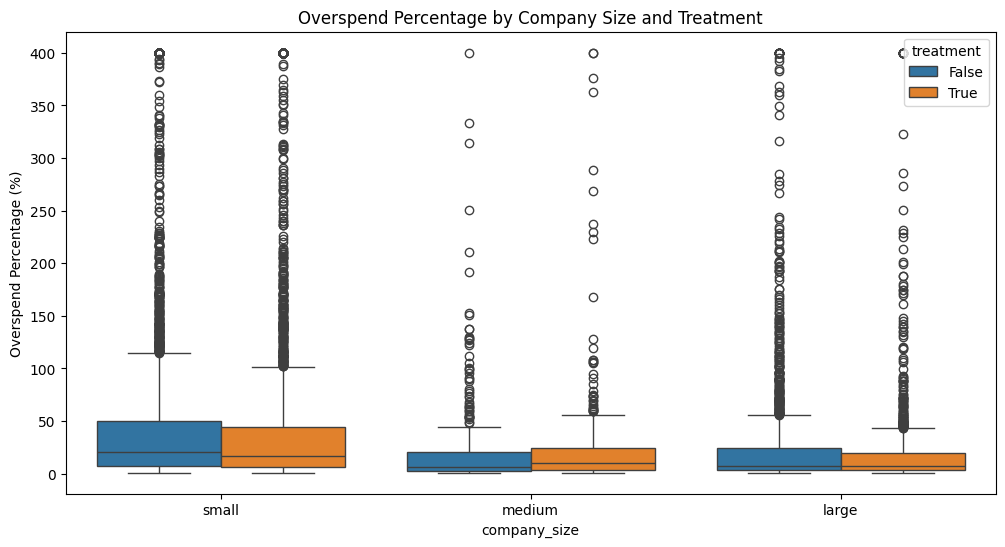

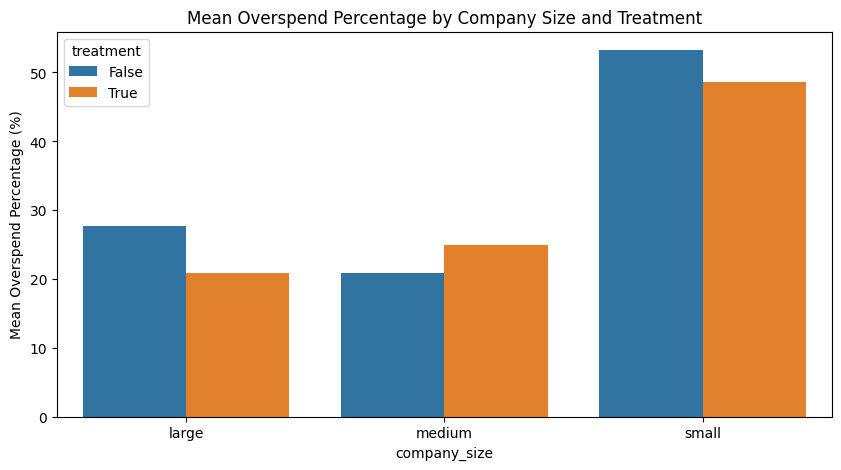

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for overspend percentage by company size and treatment
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='overspend_percentage', hue='treatment', data=df_overspend)
plt.title('Overspend Percentage by Company Size and Treatment')
plt.ylabel('Overspend Percentage (%)')
plt.show()

# Bar chart for mean overspend percentage by company size and treatment
df_agg = df_overspend.groupby(['company_size', 'treatment'])['overspend_percentage'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='company_size', y='overspend_percentage', hue='treatment', data=df_agg)
plt.title('Mean Overspend Percentage by Company Size and Treatment')
plt.ylabel('Mean Overspend Percentage (%)')
plt.show()

In [7]:
import scipy.stats as stats

# Two-sample t-test for overall comparison (treatment vs. control)
t_stat, p_value = stats.ttest_ind(df_overspend[df_overspend['treatment'] == False]['overspend_percentage'],
                                df_overspend[df_overspend['treatment'] == True]['overspend_percentage'])

print("Overall T-statistic:", t_stat)
print("Overall P-value:", p_value)


# Two-sample t-tests for each company size (treatment vs. control within each size)
for size in df_overspend['company_size'].unique():
    t_stat, p_value = stats.ttest_ind(
        df_overspend[(df_overspend['treatment'] == False) & (df_overspend['company_size'] == size)]['overspend_percentage'],
        df_overspend[(df_overspend['treatment'] == True) & (df_overspend['company_size'] == size)]['overspend_percentage']
    )
    print(f"\nCompany size '{size}':")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)


# ANOVA to compare means across all company sizes
from scipy.stats import f_oneway

small = df_overspend[df_overspend['company_size'] == 'small']['overspend_percentage']
medium = df_overspend[df_overspend['company_size'] == 'medium']['overspend_percentage']
large = df_overspend[df_overspend['company_size'] == 'large']['overspend_percentage']

f_statistic, p_value = f_oneway(small, medium, large)

print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)


Overall T-statistic: 2.443457020684412
Overall P-value: 0.014563062764774787

Company size 'small':
T-statistic: 2.1243172121818175
P-value: 0.03368042648243112

Company size 'medium':
T-statistic: -1.3105223594308104
P-value: 0.19036744263860356

Company size 'large':
T-statistic: 3.698298917886633
P-value: 0.00022050288609471648

ANOVA Results:
F-statistic: 159.46509091973635
P-value: 5.491150309591209e-69
